# Performing Sentimental Analysis with scikit-learn

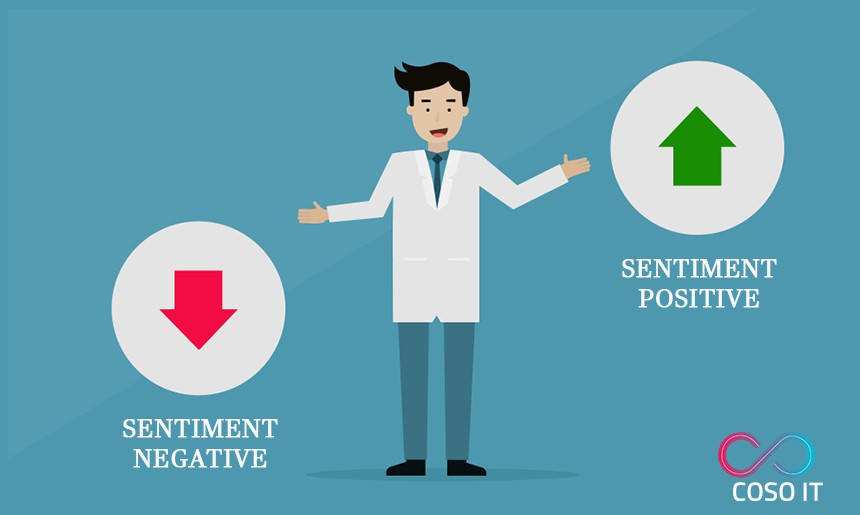

#### Sentiment analysis is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Sentiment analysis allows businesses to identify customer sentiment toward products, brands or services in online conversations and feedback.

#### Sentiment analysis of a movie review can rate how positive or negative a movie review is and hence the overall rating for a movie. Therefore, the process of understanding if a review is positive or negative can be automated as the machine learns through training and testing the data

#### Importing some important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Bag of words / Bag of n-grams model

The bag-of-words model is a way of representing text data when modeling text with machine learning algorithms.

The bag-of-words model is simple to understand and implement and has seen great success in problems such as language modeling and document classification.                                                                                       

Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.

This is called feature extraction or feature encoding.

A popular and simple method of feature extraction with text data is called the bag-of-words model of text

In [2]:

docs = np.array(['The sun is shining','The weather is sweet','The sun is shining, the weather is sweet, and one and one is two'])
docs

array(['The sun is shining', 'The weather is sweet',
       'The sun is shining, the weather is sweet, and one and one is two'],
      dtype='<U64')

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

Vectorization is the process of converting input text to numerical values for processing by studying the repetition of words in the document. Based on recurrence of the words, the count and the frequency of occurrence out of all the words in the document are calculated.                                                                                              
Count Vectorizer is one of the methods to do this. 


 CountVectorizer is used to transform a corpora of text to a vector of term / token counts. It also provides the capability to preprocess your text data prior to generating the vector representation making it a highly flexible feature representation module for text.

In [4]:
count = CountVectorizer()

In [5]:
bag = count.fit_transform(docs)

In [6]:
print(count.vocabulary_)

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


In [7]:
print(bag.toarray())

[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

Term Frequency (TF)
The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.


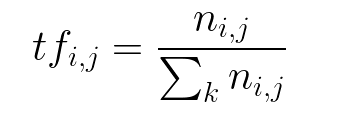

Inverse Data Frequency (IDF)
The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.


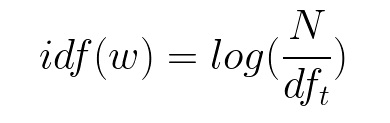

In [9]:
tfidf = TfidfTransformer()
np.set_printoptions(precision = 2)

In [10]:
tfidf = TfidfTransformer(use_idf = True,norm = 'l2',smooth_idf = True)
print(tfidf.fit_transform(bag).toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


#### Loading dataset

 IMDB movie reviews dataset
- http://ai.stanford.edu/~amaas/data/sentiment
- Contains 25000 positive and 25000 negative reviews
<img src="https://i.imgur.com/lQNnqgi.png" align="center">
- Contains at most reviews per movie
- At least 7 stars out of 10 $\rightarrow$ positive (label = 1)
- At most 4 stars out of 10 $\rightarrow$ negative (label = 0)
- 50/50 train/test split
- Evaluation accuracy

In [11]:
df =pd.read_csv("movie_data.csv")

In [12]:
df.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [13]:
df.loc[0,'review'][-50:]

'is seven.<br /><br />Title (Brazil): Not Available'

#### Data preparation

In [14]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

here we are removing special characters hence they are not necessary 

In [15]:
preprocessor(df.loc[0,'review'][-50:])

'is seven title brazil not available'

In [16]:
df['review'] = df['review'].apply(preprocessor)

In [17]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [18]:
def tokenizer(text):
    return text.split()


In [19]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [20]:
tokenizer("runners like runing and the way they run")

['runners', 'like', 'runing', 'and', 'the', 'way', 'they', 'run']

In [21]:
tokenizer_porter("runners like running and the way they run")

['runner', 'like', 'run', 'and', 'the', 'way', 'they', 'run']

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Usha
[nltk_data]     Rani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)
[w for w in tokenizer_porter("a runner like running and runs a lot")[-10:] if w not in stop]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

['runner', 'like', 'run', 'run', 'lot']

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer(strip_accents = None,lowercase = False,preprocessor = None,tokenizer = tokenizer_porter,use_idf=True,norm = 'l2',smooth_idf = True)
y = df.sentiment.values
x = tfidf.fit_transform(df.review)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1,test_size = 0.5,shuffle = False)

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5,scoring = 'accuracy',random_state = 0,n_jobs = -1,verbose = 3,max_iter = 300).fit(x_train,y_train)

In [ ]:

saved_model = open('saved_model.sav','wb')
pickle.dump(clf,saved_model)
saved_model.close()

In [29]:
import pickle
filename = 'saved_model.sav'
saved_clf = pickle.load(open(filename,'rb'))

In [30]:
saved_clf.score(x_test,y_test)

0.89608